In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [3]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")
dataFrame.head()

,fiyat,bisiklet özellikleri,bisiklet özellikleri 2
0,2387420,283402,2834234
1,328734802,2837402,2842
2,273420,273402,9564586
3,20384720,504,48594
4,273402,37402,8374583


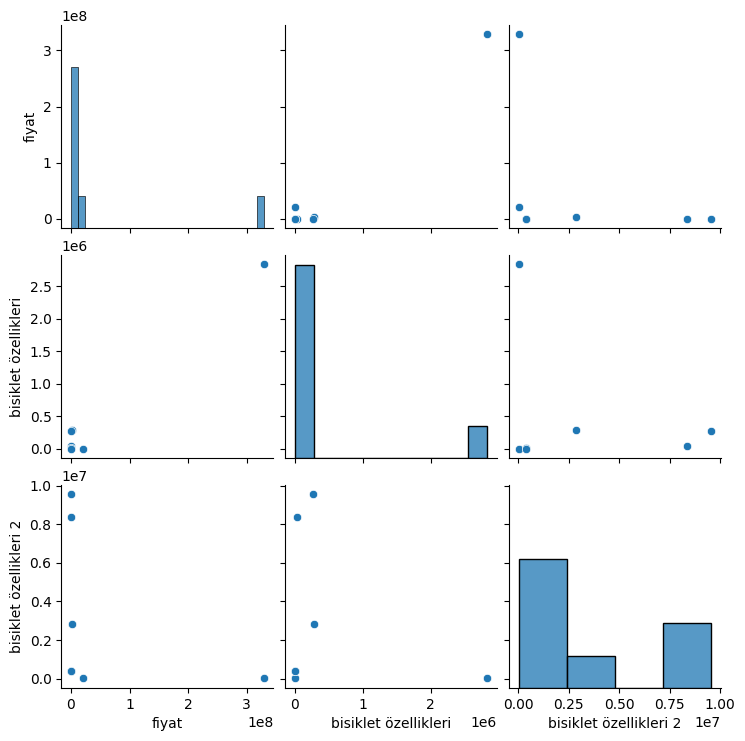

In [4]:
sbn.pairplot(dataFrame)

VERİYİ TEST/TRAİN OLARAK İKİYE AYIRMAK

In [7]:
#y = wx + b
#y -> label
#x -> feature (özellik)
y = dataFrame["fiyat"].values
x = dataFrame[["bisiklet özellikleri","bisiklet özellikleri 2"]]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=15)

In [10]:
x_train.shape

(4, 2)

In [11]:
x_test.shape

(3, 2)

SCALING

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train  = scaler.transform(x_train)
x_test = scaler.transform(x_test)

c:\Users\emreu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #kaç tane nöron olacağını vermek için kullanılır.

In [35]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse") # compile, yapılan işlemleri birleştirip çalıştırmaya yara. 

In [36]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250

1/1 [==============================] - 1s 518ms/step - loss: 27018090923425792.0000
Epoch 2/250
1/1 [==============================] - 0s 4ms/step - loss: 27018088775942144.0000
Epoch 3/250
1/1 [==============================] - 0s 2ms/step - loss: 27018088775942144.0000
Epoch 4/250
1/1 [==============================] - 0s 5ms/step - loss: 27018088775942144.0000
Epoch 5/250
1/1 [==============================] - 0s 4ms/step - loss: 27018088775942144.0000
Epoch 6/250
1/1 [==============================] - 0s 5ms/step - loss: 27018090923425792.0000
Epoch 7/250
1/1 [==============================] - 0s 3ms/step - loss: 27018088775942144.0000
Epoch 8/250
1/1 [==============================] - 0s 4ms/step - loss: 27018088775942144.0000
Epoch 9/250
1/1 [==============================] - 0s 4ms/step - loss: 27018090923425792.0000
Epoch 10/250
1/1 [==============================] - 0s 5ms/step - loss: 27018090923425792.0000
Epoch 11/250
1/1 [==============================] - 0s 3

In [40]:
loss = model.history.history["loss"]

<Axes: >

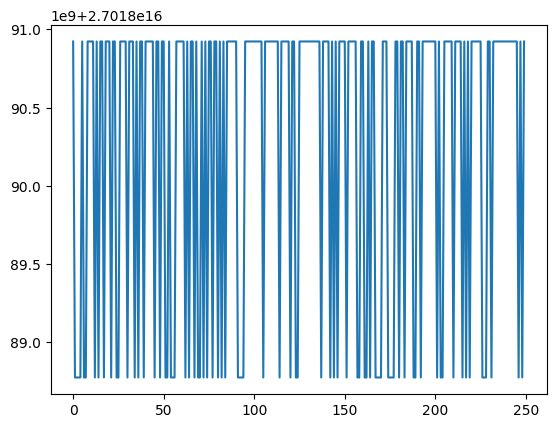

In [41]:
sbn.lineplot(x = range(len(loss)), y = loss)

In [42]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 174ms/step - loss: 27018090923425792.0000


2.701809092342579e+16

In [44]:
testTahminleri = model.predict(x_test) #x testi verip y testi tahmin etmesini sağlar.

1/1 [==============================] - 0s 66ms/step


In [45]:
testTahminleri

array([[  32834.348],
       [6541192.   ],
       [ 251996.98 ]], dtype=float32)

In [47]:
tahminDF = pd.DataFrame(y_test,columns=["gerçek y"])
tahminDF

,gerçek y
0,20384720
1,273420
2,23720


In [48]:
testTahminleri.shape

(3, 1)

In [49]:
testTahminleri = pd.Series(testTahminleri.reshape(3))

In [50]:
testTahminleri

0    3.283435e+04
1    6.541192e+06
2    2.519970e+05
dtype: float32

In [51]:
tahminDF = pd.concat([tahminDF, testTahminleri], axis=1)

In [52]:
tahminDF

,gerçek y,0
0,20384720,3.283435e+04
1,273420,6.541192e+06
2,23720,2.519970e+05


In [54]:
tahminDF.columns= ["Gerçek Y","Tahmin Y"]
tahminDF

,Gerçek Y,Tahmin Y
0,20384720,3.283435e+04
1,273420,6.541192e+06
2,23720,2.519970e+05


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

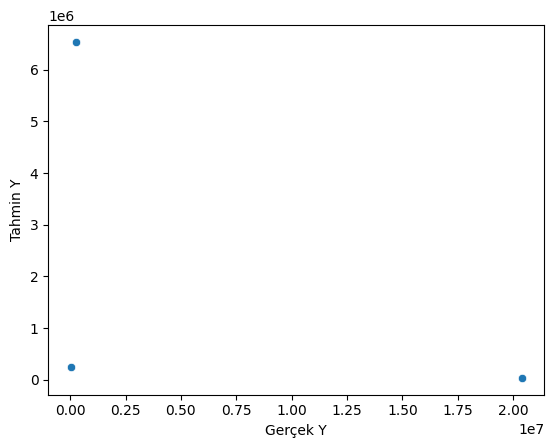

In [58]:
sbn.scatterplot(x= "Gerçek Y", y="Tahmin Y", data=tahminDF)
#bir yerde bir hata var ama onu bulamadım.

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
mean_absolute_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"])

8949311.545572916

In [62]:
mean_squared_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"])

151178775277218.25

In [63]:
dataFrame.describe()

,fiyat,bisiklet özellikleri,bisiklet özellikleri 2
count,7.000000e+00,7.000000e+00,7.000000e+00
mean,5.029762e+07,4.914336e+05,3.083918e+06
std,1.230034e+08,1.042179e+06,4.150646e+06
min,5.839000e+03,5.040000e+02,2.842000e+03
25%,1.485610e+05,3.961500e+03,2.118385e+05
50%,2.734200e+05,3.740200e+04,3.875030e+05
75%,1.138607e+07,2.784020e+05,5.604408e+06
max,3.287348e+08,2.837402e+06,9.564586e+06


In [66]:
yeniBisikletOzellikleri = [[1760,1758]]

In [67]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [68]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 21ms/step


array([[2277.954]], dtype=float32)

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save("bisiklet_modeli.h5")

c:\Users\emreu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
sonradanCagirilacakModel = load_model("bisiklet_modeli.h5")

In [72]:
sonradanCagirilacakModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 68ms/step


array([[2277.954]], dtype=float32)